In [ ]:
#Question 1 of Assignment 2

In [9]:
import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from statistics import mean
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


In [2]:
df=pd.DataFrame()
df_test=pd.DataFrame()

In [3]:
def getDataFrame():
    global df
    global df_test
    
    filename=['training_subsetD.arff','testingD.arff']
    
    for i in filename:
        file1=open(i)
        dataset = arff.load(file1)

        attributes_list = dataset.get("attributes",[])
        data=dataset.get("data")

        attribute_vector=[]
        X=[]

        for idx, attribute_info in enumerate(attributes_list):
            attribute_vector+=[attribute_info[0]]

        for row in data:
            X+=[row]
    
        if i=='training_subsetD.arff':
            df=pd.DataFrame(X,columns=attribute_vector)
        else:
            df_test=pd.DataFrame(X,columns=attribute_vector)
getDataFrame()

In [4]:
def CleaningAndEncodingTrain():
    global df
    
    #Handling Null Values 
    for i in df.columns:
        nullcount=0
        for j in df[i]:
            if j=='NULL':
                nullcount+=1
        if nullcount>=20000:
            df.drop(i,axis=1,inplace=True)
        elif nullcount<20000 and nullcount>0 and nullcount<(0.2*40000):  #if no of NULL values isless than 20%, using mode and if its greater, it will create bias in data
            #print(i);print(nullcount)
            for j in df[i]:
                if j=='NULL':
                    df[i].replace('NULL',df[i].mode()[0],inplace=True)
        elif nullcount<20000 and nullcount>0 and nullcount>=(0.2*40000): #if more than 20% drop that column
            df.drop(i,axis=1,inplace=True)
    
    
   #Handling None values
    for i in df.columns:
        if df[i].isnull().sum()>=20000:
            df.drop(i,axis=1,inplace=True)
        elif df[i].isnull().sum()>0 and df[i].isnull().sum()<(0.2*40000):
            df[i].fillna(df[i].mode()[0],inplace=True)
        elif df[i].isnull().sum()>0 and df[i].isnull().sum()>=(0.2*40000):
            df.drop(i,axis=1,inplace=True)

    #Encoding test data
    l_encoder = preprocessing.LabelEncoder()
    for i in df.columns:                #including last column
        df[i]= l_encoder.fit_transform(df[i])
    
CleaningAndEncodingTrain()

In [5]:
def CleaningAndEncodingTest():
    global df_test
    
    #Handling Null Values 
    for i in df_test.columns:
        nullcount=0
        for j in df_test[i]:
            if j=='NULL':
                nullcount+=1
        if nullcount>=20000:
            df_test.drop(i,axis=1,inplace=True)
        elif nullcount<20000 and nullcount>0 and nullcount<(0.2*40000):  #if no of NULL values isless than 20%, using mode and if its greater, it will create bias in data
            #print(i);print(nullcount)
            for j in df_test[i]:
                if j=='NULL':
                    df_test[i].replace('NULL',df_test[i].mode()[0],inplace=True)
        elif nullcount<20000 and nullcount>0 and nullcount>=(0.2*40000): #if more than 20% drop that column
            df_test.drop(i,axis=1,inplace=True)
    
    
   #Handling None values
    for i in df_test.columns:
        if df_test[i].isnull().sum()>=20000:
            df_test.drop(i,axis=1,inplace=True)
        elif df_test[i].isnull().sum()>0 and df_test[i].isnull().sum()<(0.2*40000):
            df_test[i].fillna(df_test[i].mode()[0],inplace=True)
        elif df_test[i].isnull().sum()>0 and df_test[i].isnull().sum()>=(0.2*40000):
            df_test.drop(i,axis=1,inplace=True)

    #Encoding test data
    l_encoder = preprocessing.LabelEncoder()
    for i in df_test.columns:                #including last column
        df_test[i]= l_encoder.fit_transform(df_test[i])
    
CleaningAndEncodingTest()

In [6]:
X_df=df.values[:,0:138]
Y_df=df.values[:,138]
X_dftest=df_test.values[:,0:138]
Y_dftest=df_test.values[:,138]

[74.78399999999999, 73.52, 71.748, 70.34, 69.908]
[6, 9, 12, 15, 18]


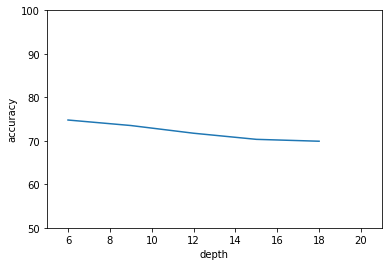

In [12]:
#Training model and testing on Test Data

accuracy_list=[]
depth_list=[]

for i in range(6,20,3):
    #Decisio tree on training and test data and finding accuracy
    df_entropy = DecisionTreeClassifier( criterion = "entropy", 
            max_depth =i)
  
    # Perform training 
    df_entropy.fit(X_df, Y_df) 

    #prediction
    Y_pred = df_entropy.predict(X_dftest) 

    #measures
    acc=accuracy_score(Y_dftest,Y_pred)*100;
    accuracy_list.append(acc)
    depth_list.append(i)

print(accuracy_list)
print(depth_list)

#Plot
plt.plot(depth_list,accuracy_list)  
plt.xlim(5,21)
plt.ylim(50,100)
# naming the x axis 
plt.xlabel('depth') 
# naming the y axis 
plt.ylabel('accuracy') 
# function to show the plot 
plt.show()

[62.017247844019494, 56.60542432195975, 80.45, 80.64758094761845, 61.970246280785105]
68.33809987887656
[61.39232595925509, 51.19360079990001, 80.1125, 79.80997624703087, 36.21702712839105]
61.7450860269154
[60.49243844519435, 44.35695538057743, 79.175, 77.29716214526816, 35.5919489936242]
59.382700992932826
[53.93075865516811, 42.369703787026616, 77.3, 76.32204025503188, 34.766845855731965]
56.93786971059171
[51.606049243844524, 42.56967879015123, 74.6125, 73.7217152144018, 34.55431928991124]
55.41285250766176
[6, 9, 12, 15, 18]
[68.33809987887656, 61.7450860269154, 59.382700992932826, 56.93786971059171, 55.41285250766176]


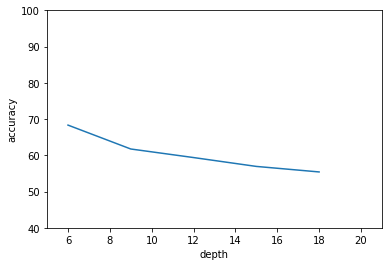

In [13]:
#Training and 5-fold validation
accuracy_list_avg=[]
depth_list_fold=[]


for i in range(6,20,3):
    accuracy=[]
    
    folds=model_selection.StratifiedKFold(n_splits=5, random_state=100)
    
    for train_index,test_index in folds.split(X_df,Y_df):
            #print("Train Index: ", train_index, "\n")
            #print("Test Index: ", test_index)
            
            X_train, X_test, y_train, y_test = X_df[train_index], X_df[test_index], Y_df[train_index], Y_df[test_index]
            
            df_entropy = DecisionTreeClassifier( criterion = "entropy", max_depth =i)
            #df_rf=RandomForestClassifier(n_estimators=100)
            df_entropy.fit(X_train, y_train)
            
            #prediction
            y_pred = df_entropy.predict(X_test) 

            #measures
            acc=accuracy_score(y_test,y_pred)*100;
            accuracy.append(acc)
    print(accuracy)
    print(mean(accuracy))
    accuracy_list_avg.append(mean(accuracy))
    depth_list_fold.append(i)
    
    
print(depth_list_fold)
print(accuracy_list_avg)


#Plot
plt.plot(depth_list_fold,accuracy_list_avg)  
plt.xlim(5,21)
plt.ylim(40,100)
# naming the x axis 
plt.xlabel('depth') 
# naming the y axis 
plt.ylabel('accuracy') 
# function to show the plot 
plt.show()



In [ ]:
optimal_depth=0
optimal_accuracy=0


for (i,j) in zip(accuracy_list_avg,depth_list_fold):
    if optimal_accuracy<i:
        optimal_accuracy=i
        optimal_depth=j
        
print("Optimal tree depth",optimal_depth," with accuracy=",optimal_accuracy)